In [34]:
%reset -f
%reload_ext autoreload
%autoreload 2

import os
import sys
import importlib
import numpy as np
import pandas as pd
from pathlib import Path
# === Setup ===
# Might need to change to main directory of MolFeatures
ROOT_DIR = Path().resolve().parent
print(f"Setting ROOT_DIR to: {ROOT_DIR}")
sys.path.append(ROOT_DIR)
sys.path.append(os.path.join(ROOT_DIR, 'M3_modeler'))
sys.path.append(os.path.join(ROOT_DIR, 'M2_data_extractor'))
sys.path.append(os.path.join(ROOT_DIR, 'utils'))
os.chdir(ROOT_DIR)  # Set working directory

# === Clear old module caches ===
for module in ['data_extractor', 'feather_extractor', 'gaussian_handler', 'help_functions', 'modeling', 'plot']:
    sys.modules.pop(module, None)

# === Safe Imports ===
try:

    from help_functions import dict_to_horizontal_df, get_df_from_file, pick_samples_to_remove_for_distribution, add_output_column_csv
    from modeling import (
        ClassificationModel,
        LinearRegressionModel,
        fit_and_evaluate_single_combination_regression,
        fit_and_evaluate_single_combination_classification
        
    )
    import plot
except ModuleNotFoundError as e:
    print(f"Module import failed: {e} \nPlease ensure all required modules are installed and available in the path specified on the right hand corner of the notebook.")

# === Config ===
pd.set_option('display.max_columns', None)
examples_path=ROOT_DIR / 'Getting_started_with_examples'
os.chdir(examples_path)
    

Setting ROOT_DIR to: C:\Users\edens\Documents\GitHub\LabCode\MolFeatures


In the next part, an example file from directory modeling_example is used, but you can pick any csv, just specify the correct path.

**Note that you need to have an output column values in order to create a model, either add manually, or in target_csv_filepath enter the location of the output csv**

In [35]:

modeling_example_dir = r'C:\Users\edens\Documents\GitHub\possible_dataset_info\Lucas'
csv_path = modeling_example_dir + r'\features_Lucas_new_3_without_20251003_074025.csv' #r'\features_Lucas_new_with_2004.csv' ## last 
csv_filepaths = {
'features_csv_filepath': csv_path,
'target_csv_filepath': ''
}

df = pd.read_csv(csv_path, encoding='utf-8')
import numpy as np
leave_out = np.random.choice(df['name'].unique(), size=3, replace=False).tolist()
print(leave_out)
# leave_out = ['LS1734', 'LS2004', 'LS2008']
# print("Randomly leaving out samples:", df['name'])
# add Py3Me_Ox to leave out if not already there
# if 'Py3Me_Ox' not in leave_out:
#       # remove last element
#     leave_out.append('LS1661')
# if 'Py5Ph_Ox' not in leave_out:
#       # remove last element
#     leave_out.append('LS2000_planar')
# leave_out = ['Py5OMe_Ox4Ph', 'Py4CF3_ImPhMe', 'Py3Me_Ox'] # 'Py3iPr_Ox'
# print("Leave out samples:", leave_out)
regression_model = LinearRegressionModel(csv_filepaths, process_method='one csv', y_value='output',
                                        leave_out=leave_out, min_features_num=1,
                                        max_features_num=1, metrics=None, return_coefficients=False)


['Py4CF3_ImPhMe_Ox', 'Py5Mesityl_Ox', 'Py_Ox']
Reusing existing run directory: runs\features_Lucas_new_3_without_20251003_074025_output_linear_20251101
Database already exists at: C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\Getting_started_with_examples\runs\features_Lucas_new_3_without_20251003_074025_output_linear_20251101\db\results_features_Lucas_new_3_without_20251003_074025.db
Table 'regression_results' has been ensured to exist.
linear model selected
Processed features_Lucas_new_3_without_20251003_074025.csv
Molecule names: from column 'name' | Target: output
Rows: 25 | Features: 56 â 55
Dropped User-specified cols: ['id']
leaving out ['Py4CF3_ImPhMe_Ox', 'Py5Mesityl_Ox', 'Py_Ox']
d
8     1.629255
16    0.058000
0     0.047395
Name: output, dtype: float64 left


Using 1 jobs for evaluation. Found 20 cores.
Loaded 1542 existing results from DB.
Combos to run: 0, done_combos: 1541
No new combinations to evaluate at threshold 0.900.
| formula                                        |     R.sq |     Q.sq |      MAE |   Model_id |
|:-----------------------------------------------|---------:|---------:|---------:|-----------:|
| ('hirshfeld_atom_5', 'angle_[11, 12, 5]')      | 0.900755 | 0.871216 | 0.204873 |          0 |
| ('cm5_atom_12', 'angle_[11, 12, 5]')           | 0.900606 | 0.866104 | 0.201632 |          1 |
| ('angle_[11, 12, 5]', 'bond_length_5-11')      | 0.863328 | 0.825114 | 0.242597 |          2 |
| ('hirshfeld_diff_11-5', 'angle_[11, 12, 5]')   | 0.857337 | 0.815314 | 0.258969 |          3 |
| ('Frequency_Stretch_4_5', 'bond_length_11-12') | 0.864465 | 0.814928 | 0.223913 |          4 |

Model Coefficients

|                   |   Estimate |   Std. Error |   t value |     p value |
|:------------------|-----------:|-------------:|----

,combination,r2,q2,mae,rmsd
962,"('hirshfeld_atom_5', 'angle_[11, 12, 5]')",0.900755,0.871216,0.204873,0.253529
1145,"('cm5_atom_12', 'angle_[11, 12, 5]')",0.900606,0.866104,0.201632,0.258511
1405,"('angle_[11, 12, 5]', 'bond_length_5-11')",0.863328,0.825114,0.242597,0.295443
1313,"('hirshfeld_diff_11-5', 'angle_[11, 12, 5]')",0.857337,0.815314,0.258969,0.303608
202,"('Frequency_Stretch_4_5', 'bond_length_11-12')",0.864465,0.814928,0.223913,0.303925


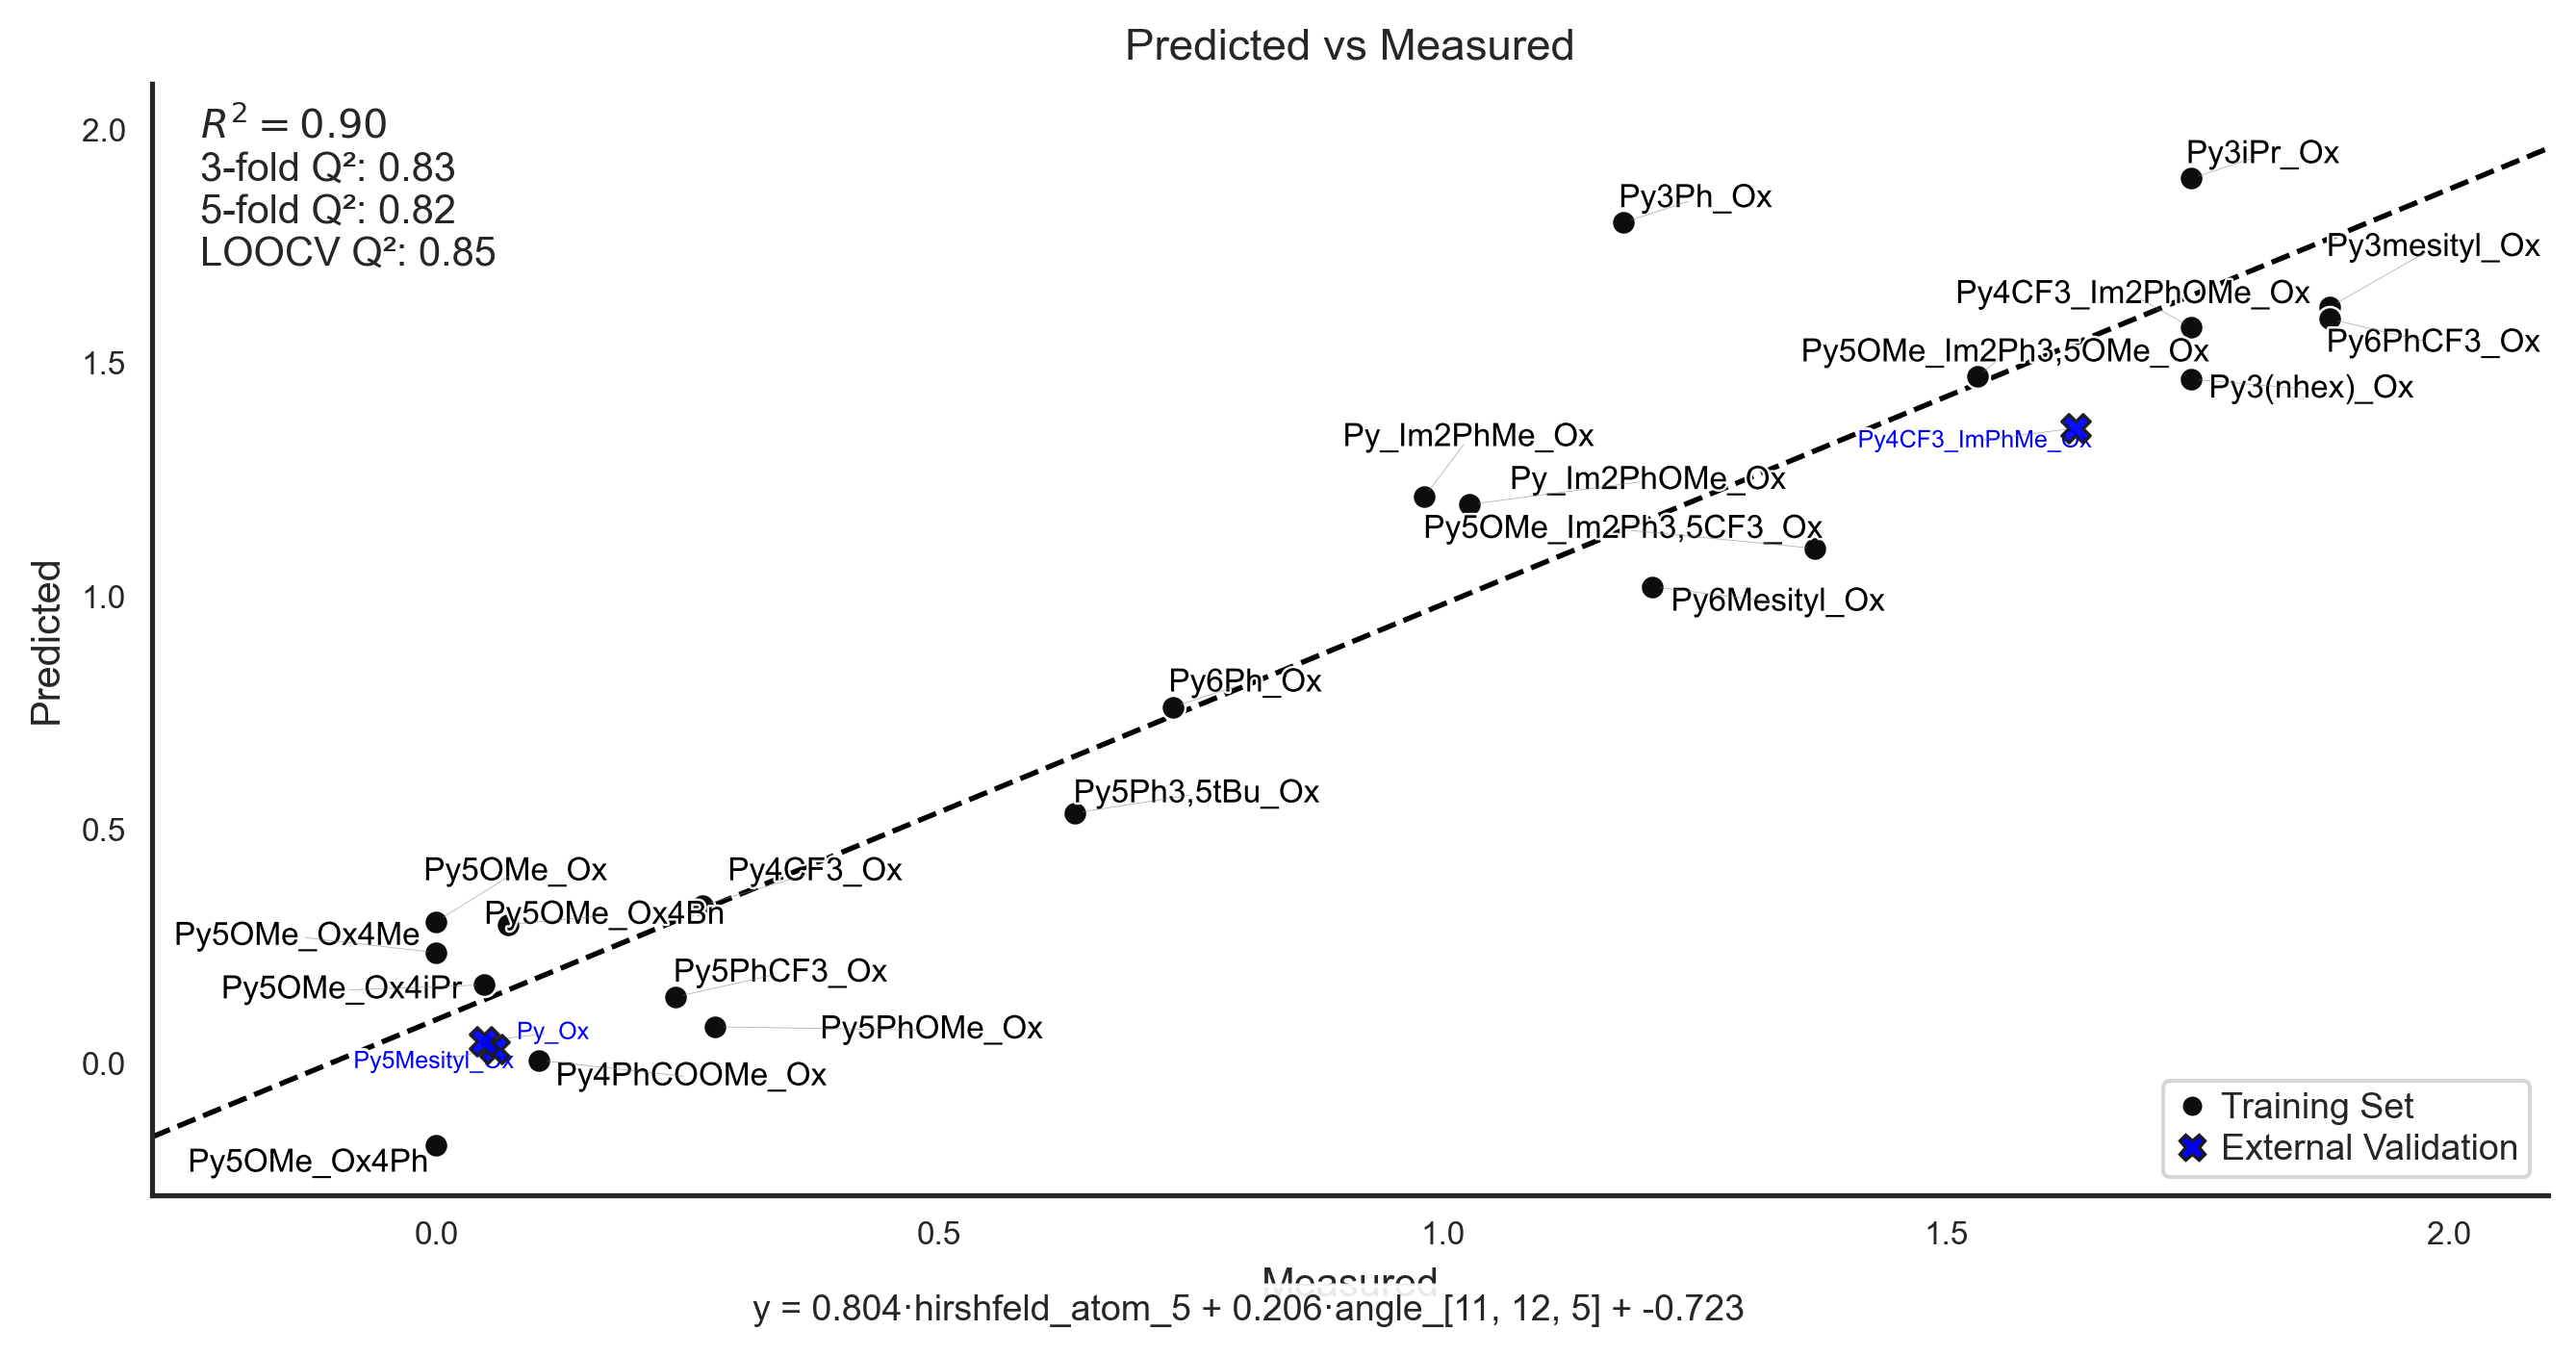

In [36]:
regression_model.search_models(top_n=5,threshold=0.9)

example use on a selected combination.

Saving report to: runs\features_Lucas_new_3_without_20251003_074025_output_linear_20251101\figs\report_para.pdf and PNGs to: runs\features_Lucas_new_3_without_20251003_074025_output_linear_20251101\figs\report_para
Calling generate_q2_scatter_plot...
predicitions,            Molecule    Actual  Predicted   Error in %
0  Py4CF3_ImPhMe_Ox  1.629255   0.550827    66.191464
1     Py5Mesityl_Ox  0.058000   0.705710  1116.741226
2             Py_Ox  0.047395   0.785348  1557.014920
Debugging print


C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\M3_modeler\plot.py:356: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a, b = float(coefficients[0]), float(coefficients[1])   # slope, intercept


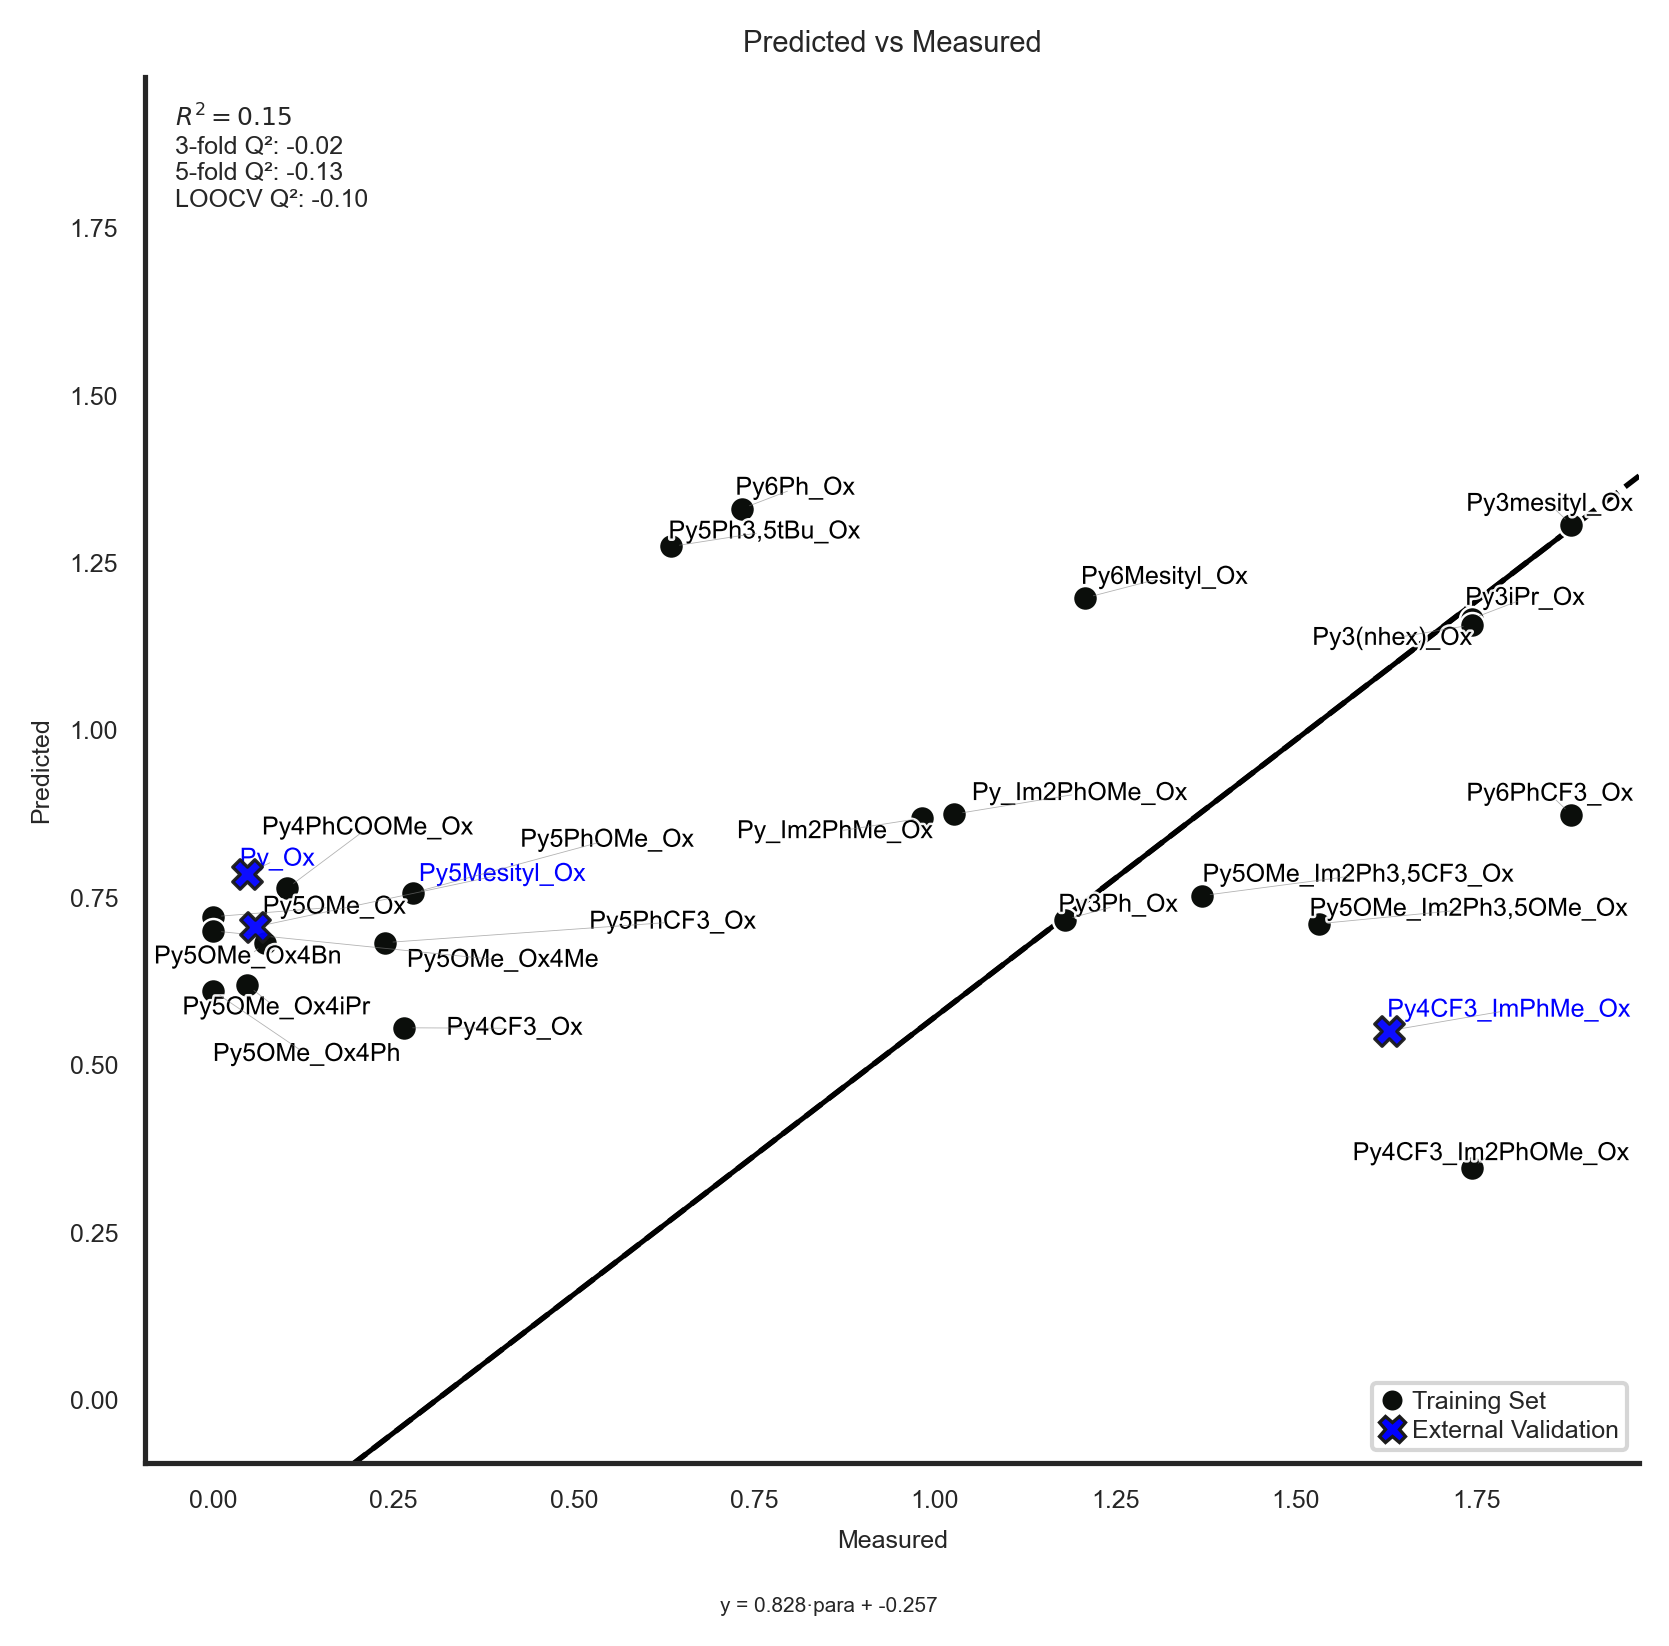

[SANITY] Running sanity checks on model 'features_Lucas_new_3_without_20251003_074025' with 1 features and 22 samples..., path=runs\features_Lucas_new_3_without_20251003_074025_output_linear_20251101\figs\report_para


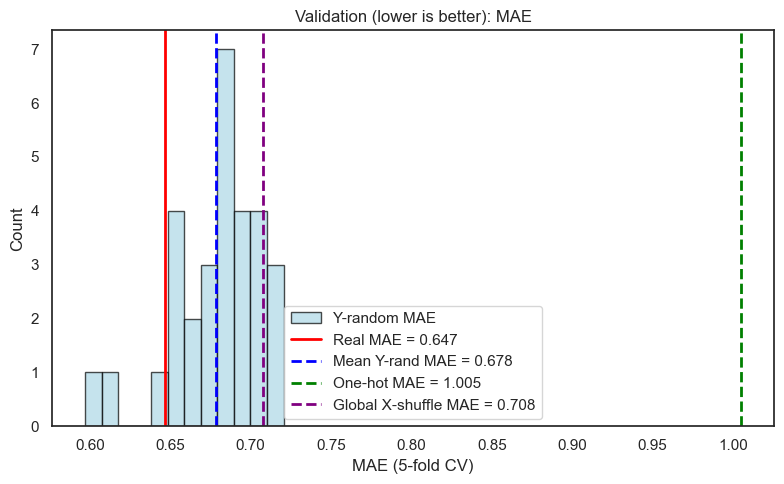

[FIG] Saved sanity_checks_validation_MAE plot to: runs\features_Lucas_new_3_without_20251003_074025_output_linear_20251101\figs\report_para\sanity_checks_validation_MAE.png


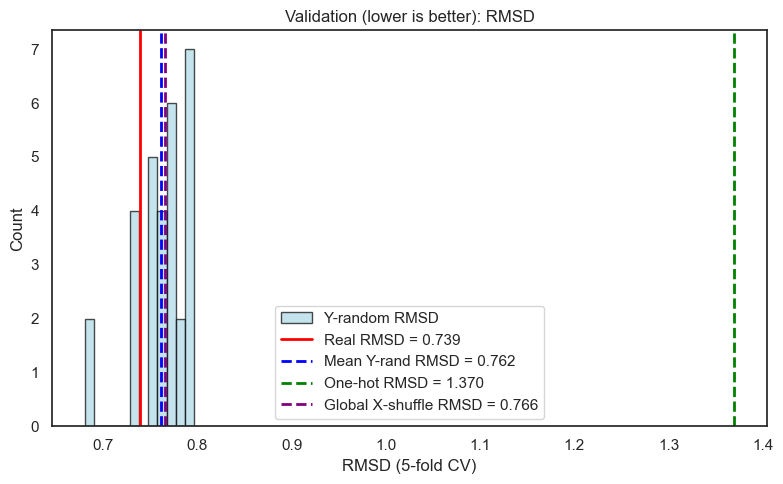

[FIG] Saved sanity_checks_validation_RMSD plot to: runs\features_Lucas_new_3_without_20251003_074025_output_linear_20251101\figs\report_para\sanity_checks_validation_RMSD.png


C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\M3_modeler\plot.py:1619: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.ylabel("MAE (5-fold CV)"); plt.title("Per-feature shuffle test: MAE (lower is better)"); plt.legend(); plt.tight_layout()


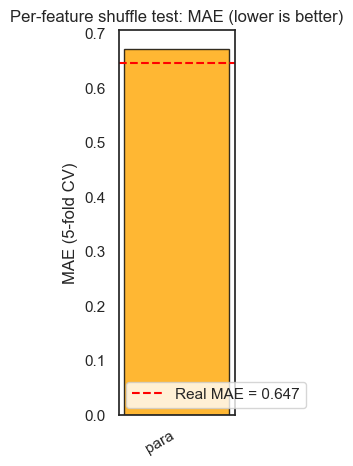

[FIG] Saved sanity_checks_per_feature_shuffle_MAE plot to: runs\features_Lucas_new_3_without_20251003_074025_output_linear_20251101\figs\report_para\sanity_checks_per_feature_shuffle_MAE.png


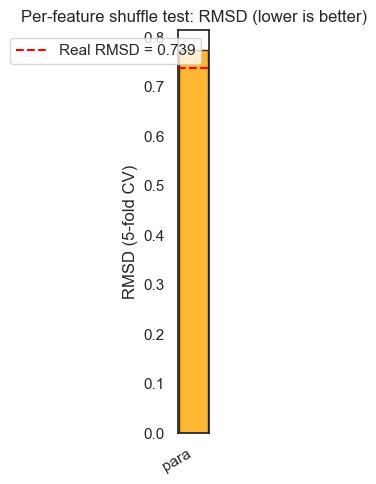

[FIG] Saved sanity_checks_per_feature_shuffle_RMSD plot to: runs\features_Lucas_new_3_without_20251003_074025_output_linear_20251101\figs\report_para\sanity_checks_per_feature_shuffle_RMSD.png
Generating violin plots for selected features...


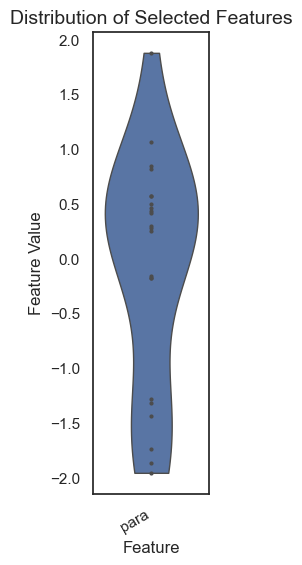

Using cutoff value = 0.246

Feature: para
Min=-1.96, Max=1.88, Unique=22
Class balance: [15  7]
Decision threshold on feature para: 0.05
Accuracy=0.73, F1=0.70, Recall=1.00
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        15
           1       0.54      1.00      0.70         7

    accuracy                           0.73        22
   macro avg       0.77      0.80      0.72        22
weighted avg       0.85      0.73      0.73        22



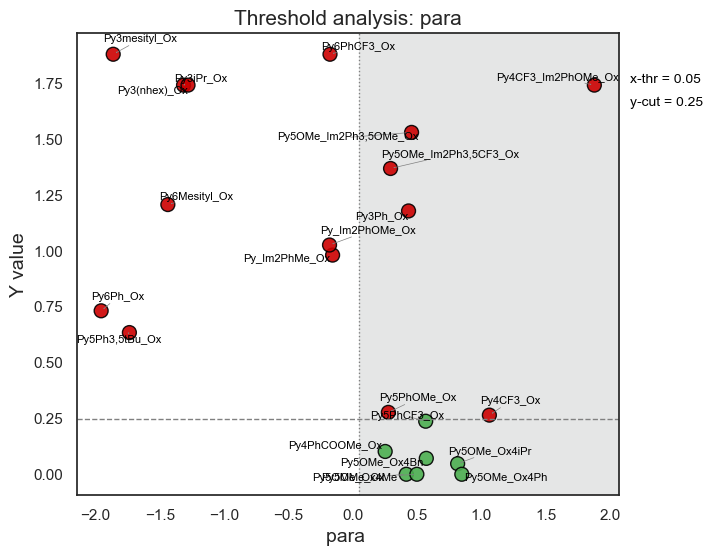

RESET p: 0.368376537494418
White p: 0.005818011896252497
BG (autocorr) p: 0.01052962632753072
Influential indices: []


{'pdf_path': 'runs\\features_Lucas_new_3_without_20251003_074025_output_linear_20251101\\figs\\report_para.pdf',
 'png_dir': 'runs\\features_Lucas_new_3_without_20251003_074025_output_linear_20251101\\figs\\report_para',
 'folds_df':    Q2_3_Fold     MAE_3  RMSD_3  Q2_5_Fold     MAE_5    RMSD_5  Q2_LOOCV  \
 0  -0.023717  0.598354  0.7021  -0.133815  0.646604  0.739082 -0.095662   
 
    MAE_LOOCV  RMSD_LOOCV  MAE_random_mean  MAE_random_std  RMSD_random_mean  \
 0   0.640418    0.727538         0.678415        0.028315           0.76185   
 
    RMSD_random_std  MAE_onehot  RMSD_onehot  MAE_global_shuffle  \
 0         0.028796    1.005137     1.369686            0.707643   
 
    RMSD_global_shuffle  MAE_real  RMSD_real  
 0             0.765575  0.646604   0.739082  ,
 'vif_df': Empty DataFrame
 Columns: []
 Index: [],
 'coef_df':              Estimate  Std. Error   t value   p value
 (Intercept)  0.828088    0.144083  5.747284  0.000013
 para        -0.256793    0.139174 -1.845117 

In [12]:
features=['para']
plot.run_single_combo_report(regression_model, features)

In [24]:
modeling_example_dir = examples_path / 'modeling_example'
csv_path=modeling_example_dir / 'Logistic_Dataset_Example.csv'
csv_filepaths = {
'features_csv_filepath': csv_path,
'target_csv_filepath': ''
}
classification_model= ClassificationModel(csv_filepaths, process_method='one csv', y_value='class',
                                        leave_out=None, min_features_num=2,
                                        max_features_num=4, metrics=None, return_coefficients=False)


Creating new run directory: runs\Logistic_Dataset_Example_class_cls_20250917
Database does not exist. It will be created at: C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\Getting_started_with_examples\runs\Logistic_Dataset_Example_class_cls_20250917\db\results_Logistic_Dataset_Example.db
Table 'classification_results' has been ensured to exist.
Loaded CSV: C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\Getting_started_with_examples\modeling_example\Logistic_Dataset_Example.csv
Names column: Unnamed: 0  |  Target column: class
Rows: 55
Features (total â kept numeric): 3 â 3

No features exceeded the correlation threshold.

Scaling only continuous (non-integer) columns: ['-2-3-', '-2-7-']
Leaving integer columns untouched: ['flag']


Using 1 jobs for evaluation. Found 20 cores.
Loaded 0 existing results from DB.
Combos to run: 4, already done: 0
Evaluating 4 new combos with McFadden RÂ² >= 0.500...


Threshold 0.500 (single-core):  50%|█████     | 2/4 [00:00<00:00, 12.50it/s]

[INFO] Evaluating combo: ('flag', '-2-3-')
[R2] Dropping duplicate columns: ['1_-2.463688204758451', '1_-1.527718375657408', '1_-1.5184001152287956', '1_-1.3486416032895638', '1_-1.3321400788962445', '1_-1.1116254441257873', '1_-1.110994410688199', '1_-1.048153997526868', '1_-1.0334719528786356', '1_-0.9605770736115059', '1_-0.9041732015137145', '1_-0.8714961866698271', '1_-0.737412098403111', '1_-0.7000444016730453', '1_-0.4807602821059164', '1_-0.4248086506384372', '1_-0.37673441991702195', '1_-0.3665958160195162', '1_-0.3631882354564771', '1_-0.35154566853270247', '1_-0.3409022378851213', '1_-0.3350967302591701', '1_-0.3270510539297158', '1_-0.14792169544208478', '1_0.10991856716260838', '1_0.11558735087706537', '1_0.1410074811885197', '1_0.3157827089566813', '1_0.38233570217591206', '1_0.42603476772994314', '1_0.4787470942177258', '1_0.48358501723935576', '1_0.6197725502980809', '1_0.6355273517902565', '1_0.6637029947792468', '1_0.718329456027757', '1_0.7266590974041093', '1_0.7863

Threshold 0.500 (single-core): 100%|██████████| 4/4 [00:00<00:00, 15.20it/s]


[R2] Dropping duplicate columns: ['1_-1.1153635071710337', '1_-1.0293247743865523', '1_-0.9873781524111834', '1_-0.9738970736529899', '1_-0.9661331824056996', '1_-0.8571577848230897', '1_-0.855855056351383', '1_-0.8391356786196632', '1_-0.7803585456780208', '1_-0.7563167226029399', '1_-0.7350377952202327', '1_-0.7073594457478174', '1_-0.6888928066061761', '1_-0.6666383763868247', '1_-0.631609798262424', '1_-0.6299242775383501', '1_-0.58046690112775', '1_-0.5744595323932652', '1_-0.5648557687072678', '1_-0.5494607286873083', '1_-0.5488217125886246', '1_-0.5474942878425788', '1_-0.5271599929535642', '1_-0.5232641556756138', '1_-0.49474921990974624', '1_-0.4733375500524458', '1_-0.4680803306511985', '1_-0.44473617732637766', '1_-0.41143942544041545', '1_-0.37497228933540133', '1_-0.3731015465537426', '1_-0.3385175013675427', '1_-0.3107928463807347', '1_-0.07488477273223541', '1_0.3882413730295345', '1_0.49880041920453466', '1_0.9410366039045214', '1_0.952134492188409', '1_1.01445245346430

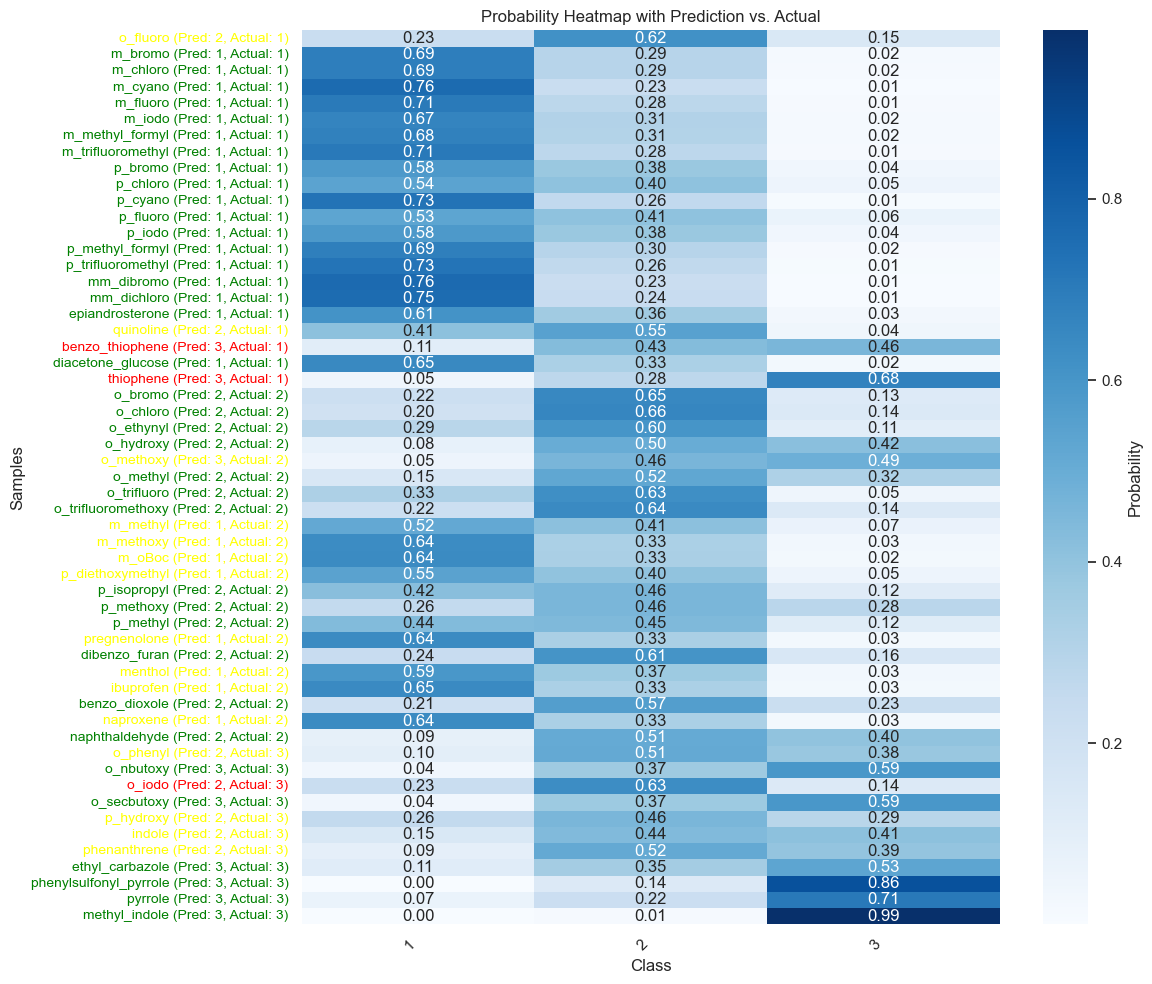





VIF Table

---

| variables   |     VIF |
|:------------|--------:|
| -2-3-       | 1.22626 |
| -2-7-       | 1.22626 |

Confusion Matrix

Results saved to classification_results.txt in C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\Getting_started_with_examples


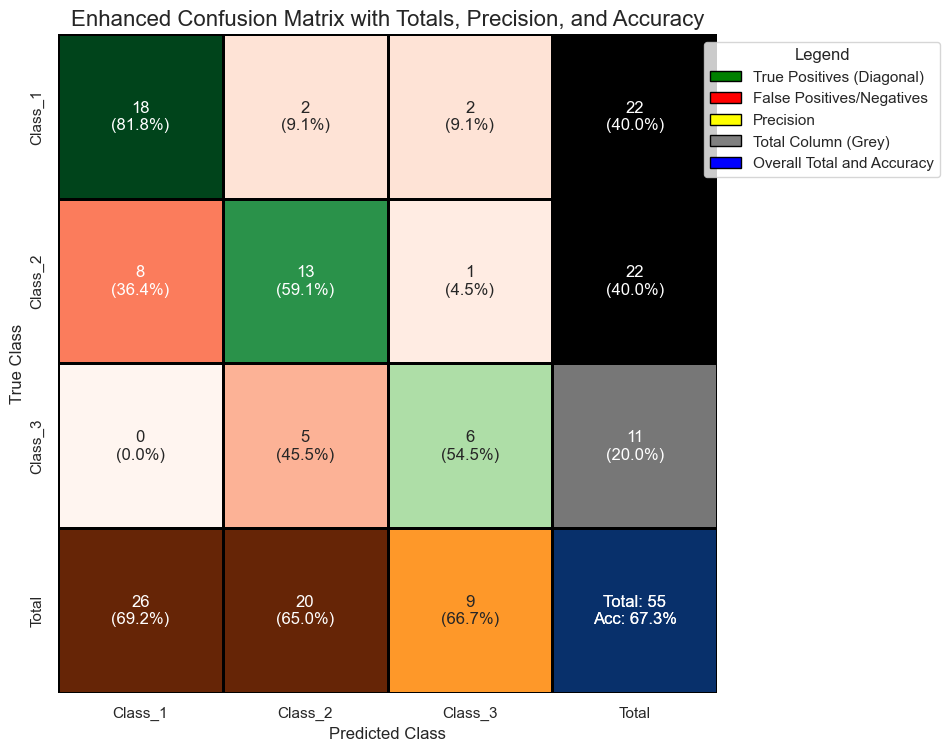

Exiting model selection.


,id,combination,accuracy,precision,recall,f1_score,mcfadden_r2,avg_mcfadden_r2,avg_accuracy,avg_f1_score,threshold,scores,model,predictions
0,NaN,"(-2-3-, -2-7-)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'accuracy': 0.6727272727272727, 'precision': ...",<modeling.ClassificationModel object at 0x0000...,"[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [26]:
classification_model.search_models(top_n=5,threshold=0.5)